In [1]:
import jax 
import numpy as np
from jax import random
import jax.numpy as jnp
from functools import partial
from jax import grad, jit, vmap
import matplotlib.pyplot as plt
from jax.config import config
from scipy.integrate import odeint
config.update("jax_enable_x64", True) # enable 64-bit precision
config.update("jax_platform_name", "cpu") # "gpu"  uncomment this line to run on CPU

In [2]:
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.xmargin'] = 0


In [3]:
def whereis(x):
    print(x.device_buffer.device())

In [4]:
x = jnp.array([1, 2, 3])
whereis(x)

TFRT_CPU_0


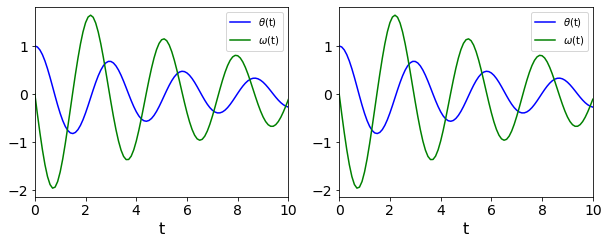

In [5]:
# damp oscillator
def f_numpy(y, t, b, c):
    return np.array([y[1], -b*y[1] - c*np.sin(y[0])])

def f_jax(y, t, b, c):
    return jnp.array([y[1], -b*y[1] - c*jnp.sin(y[0])])

# solve the ODE
t = np.linspace(0, 10, 101)
y0 = np.array([1.0, 0.0])
b = 0.25
c = 5.0
sol = odeint(f_numpy, y0, t, args=(b, c))


fig, ax = plt.subplots(1, 2, figsize=(10, 3.5))
ax[0].plot(t, sol[:, 0], 'b', label=r'$\theta$(t)')
ax[0].plot(t, sol[:, 1], 'g', label=r'$\omega$(t)')
ax[0].legend(loc='best')
ax[0].set_xlabel('t');


# solve the ODE
t = jnp.linspace(0, 10, 101)
y0 = jnp.array([1.0, 0.0])
b = 0.25
c = 5.0
sol = odeint(jit(f_jax), y0, t, args=(b, c))

ax[1].plot(t, sol[:, 0], 'b', label=r'$\theta$(t)')
ax[1].plot(t, sol[:, 1], 'g', label=r'$\omega$(t)')
ax[1].legend(loc='best')
ax[1].set_xlabel('t');



In [6]:
def euler(f, y0, t, args=()):
    y = jnp.zeros((len(t), len(y0)))
    y = y.at[0, :].set(y0)
    h = t[1] - t[0]
    for i in range(1, len(t)-1):
        y = y.at[i+1, :].set(y[i, :] + h * f(y[i, :], t[i], *args))
    return y
    

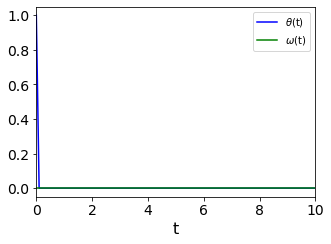

In [7]:
t = jnp.linspace(0, 10, 101)
y0 = jnp.array([1.0, 0.0])
b = 0.25
c = 5.0
sol = euler(f_jax, y0, t, args=(b, c))

fig, ax = plt.subplots(1, figsize=(5, 3.5))
ax.plot(t, sol[:, 0], 'b', label=r'$\theta$(t)')
ax.plot(t, sol[:, 1], 'g', label=r'$\omega$(t)')
ax.legend(loc='best')
ax.set_xlabel('t');


In [8]:
def euler_step(f, y0, t, dt, args=()):
    y = y0 + dt*f(y0, t, *args)
    return y

def euler(f, y0, t, args=()):
    dt = t[1]-t[0]
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = euler_step(f, y[i-1], t[i-1], dt, args)
    return y

def f_jax(y, t, b, c):
    return jnp.array([y[1], -b*y[1] - c*jnp.sin(y[0])])

t = jnp.linspace(0, 10, 101)
y0 = jnp.array([1.0, 0.0])
b = 0.25
c = 5.0
sol = euler(f_jax, y0, t, args=(b, c))

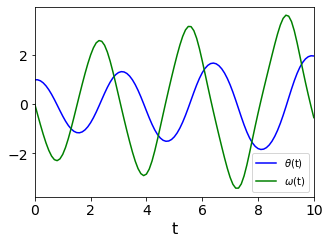

In [9]:
fig, ax = plt.subplots(1, figsize=(5, 3.5))
ax.plot(t, sol[:, 0], 'b', label=r'$\theta$(t)')
ax.plot(t, sol[:, 1], 'g', label=r'$\omega$(t)')
ax.legend(loc='best')
ax.set_xlabel('t');
